# Inferential statistics
## Part I - Data Cleaning

Your family is very passionate about basketball. You always have discussions over players, games, statistics and whatnot. As you can imagine those discussions never reach a conclusion since everyone is simply sharing their opinion with no statistics to back them up!

![](../images/basket.jpg)

Since you are attending a data analysis bootcamp you'd like to take advantage of your newfound knowledge to finally put an end to your family's discussions. 

Luckily we have found a dataset containing data related to the players of the WNBA for the 2016-2017 season that we can use. 

Let's start with cleaning the data and then we'll continue with a general exploratory analysis and some inferential statistics.

### Dataset

The dataset we will be using contains the statistics from the WNBA players for the 2016-2017 season. You will be able to find more information on the dataset in the [codebook](../data/codebook.md) uploaded to the repository.

### Libraries

First we'll import the necessary libraries first and increase the maximum number of displayed columns so you will be able to see all the dataset in the same window.

In [27]:
import pandas as pd
pd.set_option('max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

Load the dataset into a df called `wnba` and take an initial look at it using the `head()` method.

In [2]:
#your code here
wnba = pd.read_csv('../data/wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


### Check NaN values
As you know, one of our first steps is to check if there are any NaN values in the dataset to find any issues. Look for the columns that cointain NaN values and count how many rows there are with that value.

In [3]:
#your code here
wnba.isnull().sum()

Name            0
Team            0
Pos             0
Height          0
Weight          1
BMI             1
Birth_Place     0
Birthdate       0
Age             0
College         0
Experience      0
Games Played    0
MIN             0
FGM             0
FGA             0
FG%             0
3PM             0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TO              0
PTS             0
DD2             0
TD3             0
dtype: int64

We can see that there are only two NaNs in the whole dataset, one in the Weight column and one in the BMI one. Let's look at the actual rows that contain the NaN values.

In [4]:
#your code here
wnba[wnba['Weight'].isnull()]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
91,Makayla Epps,CHI,G,178,NaN,NaN,US,"June 6, 1995",22,Kentucky,R,14,52,2,14,14.3,0,5,0.0,2,5,40.0,2,0,2,4,1,0,4,6,0,0


It looks like there is only a single row that has NaN values in it, which is good! Just in case, let's check how much removing a single row may influence our dataset by calculating the percentage of values we will be removing.

In [5]:
#your code here 
len(wnba[wnba['Weight'].isnull() == True])/wnba.shape[0]

0.006993006993006993

It is very important to be as careful as possible when dealing with NaN values and only drop data when it is strictly necessary. This decision can also be influenced by the nature of our analysis. If, for example, our analysis will not require the Weight and BMI of the players at all we can simply keep the row, given that the NaN values are only present in the Weight and BMI column.

In this specific example, let's say our decision is to drop it. Write some code to drop the NaN values. 

In [6]:
#your code here
wnba.dropna(inplace=True)

**Do you think it is a good decision? Think about a case in which you wouldn't want to drop the value.**

Comments: 

Depends completely on the analysis. Personally I would have tried to get that information from somewhere else first. Also, 
possibly we could have used an average as well, or just keep it for Nan for now, as we haven't decided if these features will
be part of our analysis. 

Dropping the row will affect many analysis for example, if you want to calculate anything related to the count of players. For example avg goals per team members etc. 



### Let's make an overview of the dataset
First, check the data types of our data:

In [7]:
#your code here
wnba.dtypes

Name             object
Team             object
Pos              object
Height            int64
Weight          float64
BMI             float64
Birth_Place      object
Birthdate        object
Age               int64
College          object
Experience       object
Games Played      int64
MIN               int64
FGM               int64
FGA               int64
FG%             float64
3PM               int64
3PA               int64
3P%             float64
FTM               int64
FTA               int64
FT%             float64
OREB              int64
DREB              int64
REB               int64
AST               int64
STL               int64
BLK               int64
TO                int64
PTS               int64
DD2               int64
TD3               int64
dtype: object

It looks like most of the data types are correct. Birthdate column could be casted to a `datetime` type, however, we won't use it in our analysis so for simplicity, let's leave it as an `object`. Weight column could also be casted to an `int64` type as all numbers are integers.

**Let's change the type of Weight column for practice.**

In [8]:
#your code here
wnba['Weight'] = wnba.Weight.astype('int64')

**After checking the data types, let's check for outliers using the describe() method.**

In [13]:
#your code here
wnba.describe()

,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,184.612676,78.978873,23.091214,27.112676,24.429577,500.105634,74.401408,168.704225,43.102817,14.830986,43.697183,24.978169,39.535211,49.422535,75.828873,22.063380,61.591549,83.654930,44.514085,17.725352,9.781690,32.288732,203.169014,1.140845,0.007042
std,8.698128,10.996110,2.073691,3.667180,7.075477,289.373393,55.980754,117.165809,9.855199,17.372829,46.155302,18.459075,36.743053,44.244697,18.536151,21.519648,49.669854,68.200585,41.490790,13.413312,12.537669,21.447141,153.032559,2.909002,0.083918
min,165.000000,55.000000,18.390675,21.000000,2.000000,12.000000,1.000000,3.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,175.750000,71.500000,21.785876,24.000000,22.000000,242.250000,27.000000,69.000000,37.125000,0.000000,3.000000,0.000000,13.000000,17.250000,71.575000,7.000000,26.000000,34.250000,11.250000,7.000000,2.000000,14.000000,77.250000,0.000000,0.000000
50%,185.000000,79.000000,22.873314,27.000000,27.500000,506.000000,69.000000,152.500000,42.050000,10.500000,32.000000,30.550000,29.000000,35.500000,80.000000,13.000000,50.000000,62.500000,34.000000,15.000000,5.000000,28.000000,181.000000,0.000000,0.000000
75%,191.000000,86.000000,24.180715,30.000000,29.000000,752.500000,105.000000,244.750000,48.625000,22.000000,65.500000,36.175000,53.250000,66.500000,85.925000,31.000000,84.000000,116.500000,66.750000,27.500000,12.000000,48.000000,277.750000,1.000000,0.000000
max,206.000000,113.000000,31.555880,36.000000,32.000000,1018.000000,227.000000,509.000000,100.000000,88.000000,225.000000,100.000000,168.000000,186.000000,100.000000,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text xticklabel objects>)

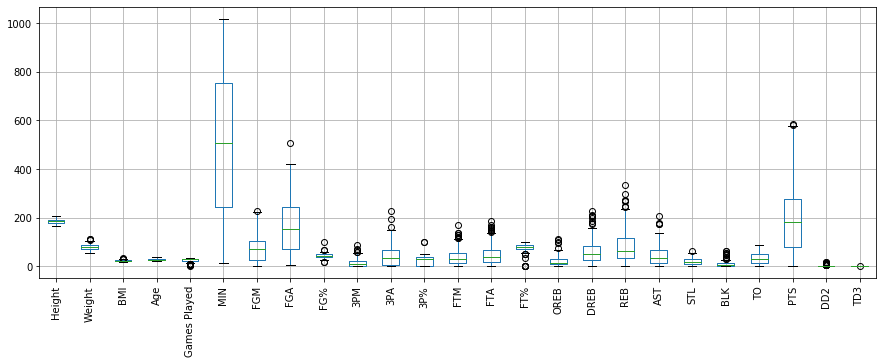

In [28]:
wnba.boxplot(figsize=(15, 5))
plt.xticks(rotation=90)

**Comment on your result. What do you see?**

Comments: 

There are some outliers in the data. Most of them are probably just fine to keep. However, I would like to investigate further the following columns 3p% (there is a maximum of 100% which seems unlikely), FT% (max of 100% as well), DD2 (double yer is said to have performed a double-double when they accumulate at least a double digit number in two out of five of the main statistics: points, rebounds, blocks, steals and assists) (max of 17)

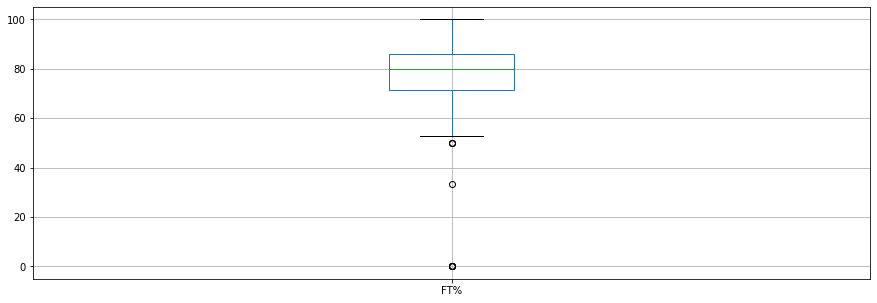

In [32]:
wnba[['FT%']].boxplot(figsize=(15, 5))


In [34]:
wnba[wnba['FT%'] == 100]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
5,Alexis Peterson,SEA,G,170,63,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
6,Alexis Prince,PHO,G,188,81,22.917610,US,"February 5, 1994",23,Baylor,R,16,112,9,34,26.5,4,15,26.7,2,2,100.0,1,14,15,5,4,3,3,24,0,0
9,Allison Hightower,WAS,G,178,77,24.302487,US,"June 4, 1988",29,LSU,5,7,103,14,38,36.8,2,11,18.2,6,6,100.0,3,7,10,10,5,0,2,36,0,0
15,Angel Robinson,PHO,F/C,198,88,22.446689,US,"August 30, 1995",21,Arizona State,1,15,237,25,44,56.8,1,1,100.0,7,7,100.0,16,42,58,8,1,11,16,58,0,0
41,Danielle Adams,CON,F/C,185,108,31.555880,US,"February 19, 1989",28,Texas A&M,5,18,81,16,43,37.2,12,30,40.0,5,5,100.0,6,4,10,4,4,4,7,49,0,0
73,Karima Christmas-Kelly,DAL,G/F,183,82,24.485652,US,"November 9, 1989",27,Duke,6,14,142,23,43,53.5,9,21,42.9,10,10,100.0,4,10,14,6,1,1,13,65,0,0


At least their attemps and score match this 100% score. So we will keep the values. 

In [36]:
wnba[wnba['3P%'] == 100]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
15,Angel Robinson,PHO,F/C,198,88,22.446689,US,"August 30, 1995",21,Arizona State,1,15,237,25,44,56.8,1,1,100.0,7,7,100.0,16,42,58,8,1,11,16,58,0,0
35,Clarissa dos Santos,SAN,C,185,89,26.004383,BR,"October 3, 1988",28,Brazil,4,7,52,8,14,57.1,1,1,100.0,0,0,0.0,3,7,10,7,1,1,5,17,0,0


This is fine, they both had 1 attempt and 1 success.

In [38]:
wnba[wnba['DD2']== wnba.DD2.max()]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
69,Jordan Hooper,CHI,F,188,84,23.76641,US,"February 20, 1992",25,Nebraska,3,29,833,164,299,54.8,22,49,44.9,117,142,82.4,108,226,334,40,29,46,46,467,17,0


**Now we can save the cleaned data to a new .csv file called `wnba_clean.csv` in the data folder.**

In [41]:
#your code here
wnba.to_csv('../data/wnba_clean.csv', index=False)